# Introduction

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from IPython.display import HTML
import sounddevice as sd

A=5
k=1
m=1
f=1;

# Solver sound generator

In [2]:
def solver_sound(Energy, apmlitude, fr=0, play=True, loop_=False):
    
    if fr == 0:
        fr = len(Energy)
    
    amp = 1

    signal_tab = Energy.copy()
    signal = signal_tab[round(0.1*len(signal_tab)):len(signal_tab)]

    samples = amp*(np.array(signal) - np.mean(signal)*np.ones(len(signal)))/np.max(np.abs(np.array(signal) - np.mean(signal)*np.ones(len(signal))))
    
    if play == True:
        sd.play(samples, fr, loop = loop_)
        sd.wait()  
        
    return samples

# Signal histogram counter

In [3]:
def count_hist(E_plot, bins=100):
    signal = solver_sound(E_plot, 1, 300000, False, False)
    en_hist, en_hist_edges = np.histogram(signal, bins=100)
    bin_center = (en_hist_edges[1]-en_hist_edges[0])/2
    en_hist_values = []
    for i in range(len(en_hist)):
        en_hist_values.append(en_hist_edges[i] + bin_center)
        
    return en_hist_values, en_hist

# Plotting functions

In [4]:
def plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name):
    
    plt.plot(t_plot, x_plot, '-b', t_plot, vx_plot, '-r', t_plot, ax_plot, '-g', linewidth = 1)
    plt.ylabel('x(t), y(t), a(t)', fontsize = '14')
    plt.xlabel('t', fontsize = '14')
    plt.title(f"{algorithm_name}: x(t), v(t), a(t)", fontsize = '16')
    plt.ylim(-10, 10)
    plt.xlim(0, 25)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['x(t)', 'v(t)', 'a(t)'])
    plt.show()

# ------------------------------------------------------  
    
def plot_phase_space(vx_plot, x_plot, algorithm_name):

    plt.plot(vx_plot, x_plot, '-b', linewidth = 1)
    plt.title(f"{algorithm_name}: x(v)", fontsize = '16')
    plt.ylabel('v(t)', fontsize = '14')
    plt.xlabel('x(t)', fontsize = '14')

    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['x(v)'])
    #plt.gca().set_aspect('equal')
    plt.show()

# ------------------------------------------------------

def plot_total_energy(t_plot, E_plot, algorithm_name):
    
    plt.plot(t_plot, E_plot, '-b', linewidth = 1)
    plt.ylabel('E(t)', fontsize = '14')
    plt.xlabel('t', fontsize = '14')
    plt.title(f"{algorithm_name}: Total Energy", fontsize = '16')
    plt.ylim(12.45, 12.55)
    plt.xlim(0, 100)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['E(t)'])
    plt.show()

# ----------------------------------------- 

def plot_signal_hist(E_plot, algorithm_name):
    en_hist_values, en_hist = count_hist(E_plot)
    plt.plot(en_hist_values, en_hist, '-b', linewidth = 1)
    plt.ylabel('H($\Delta E$)', fontsize = '14')
    plt.xlabel('$\Delta E$', fontsize = '14')
    plt.title(f"{algorithm_name}: H($\Delta E$)", fontsize = '16')
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['H($\Delta E$)'])
    plt.show()


# Theoretical solution¶

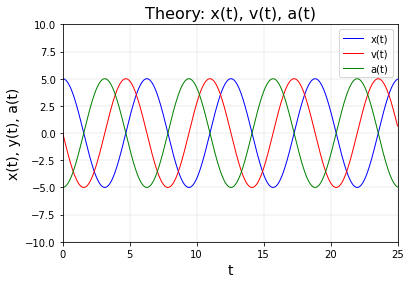

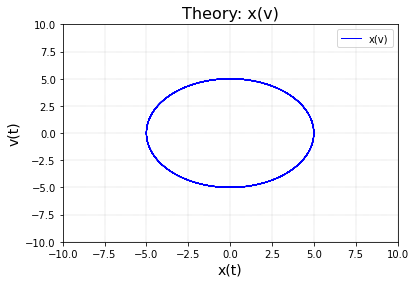

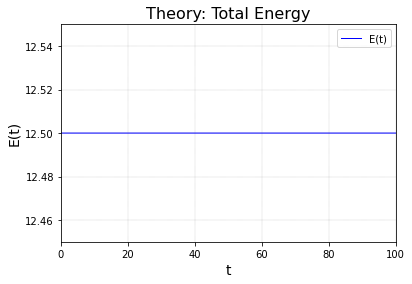

In [5]:
dt=0.001
t=np.arange(0, 100, dt)

x_theor = []
vx_theor = []
ax_theor = []
for item in t:
    x_theor.append(A*math.cos(math.sqrt(k/m)*item))
    vx_theor.append(-math.sqrt(k/m)*A*math.sin(math.sqrt(k/m)*item))
    ax_theor.append(-math.sqrt(k/m)*math.sqrt(k/m)*A*math.cos(math.sqrt(k/m)*item))
    
EK_theor = []
EP_theor = []
EC_theor = []
EI_theor = []

for i in range(len(x_theor)):
    EK_theor.append(0.5*m*vx_theor[i]**2)
    EP_theor.append(0.5*k*(x_theor[i]**2))
    EC_theor.append(EK_theor[i]+EP_theor[i])
    EI_theor.append(EC_theor[0])

t_plot = t.copy()
x_plot = x_theor.copy()
vx_plot = vx_theor.copy()
ax_plot = ax_theor.copy()
E_plot = EC_theor.copy()

algorithm_name = "Theory"
    
plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)

# Verlet algorithm - standard

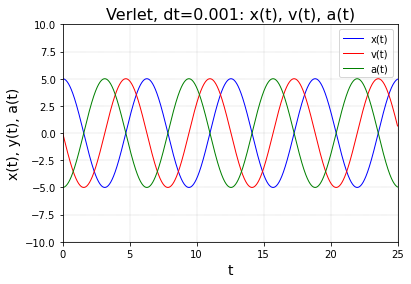

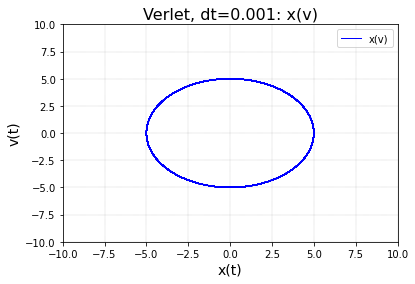

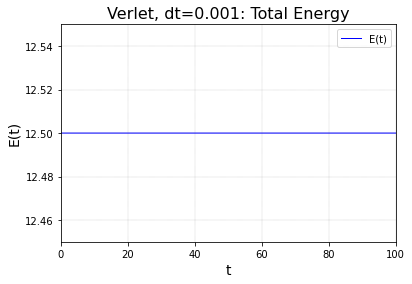

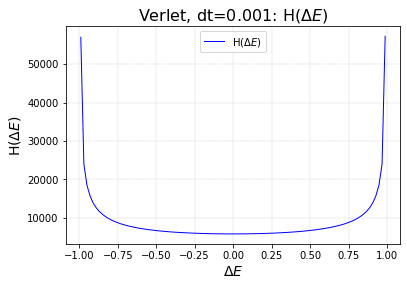

In [6]:
#dH_tab_ver_st = []
#dt_tab = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]

#dt = dt_tab[11]
#t=np.arange(0, 100, dt)

dt = 0.001
t=np.arange(0, 1000, dt)

x_st=[]
x_st.append(A);
x_st.append(math.sqrt(A**2 -(k/m)*(A*dt)**2));

vx_st=[]
vx_st.append(0)

ax_st=[]
ax_st.append(-(k/m)*x_st[0])
ax_st.append(-(k/m)*x_st[1])

for i in range(2, len(t)):
    x_st.append(2*x_st[i-1]-x_st[i-2]+(dt**2)*ax_st[i-1])
    ax_st.append(-(k/m)*x_st[i])
    vx_st.append((x_st[i]-x_st[i-2])/(2*dt))

last_x_st = 2*x_st[-1]-x_st[-2]+(dt**2)*ax_st[-1]
vx_st.append((last_x_st-x_st[-2])/(2*dt))

EK_st = []
EP_st = []
EC_st = []
EI_st = []

for i in range(len(x_st)):
    EK_st.append(0.5*m*vx_st[i]**2)
    EP_st.append(0.5*k*(x_st[i]**2))
    EC_st.append(EK_st[i]+EP_st[i])
    EI_st.append(EC_st[0])

dH = np.sqrt(np.mean(np.power(np.subtract(EI_st, EC_st), 2)))

t_plot = t.copy()
x_plot = x_st.copy()
vx_plot = vx_st.copy()
ax_plot = ax_st.copy()
E_plot = EC_st.copy()

algorithm_name = f"Verlet, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)
plot_signal_hist(E_plot, algorithm_name)
    

# Verlet algorithm - leap frog

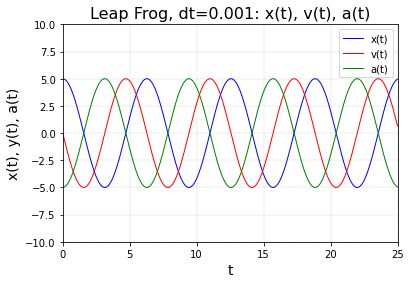

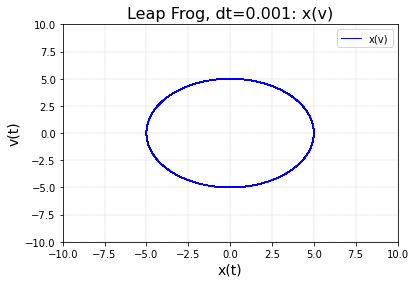

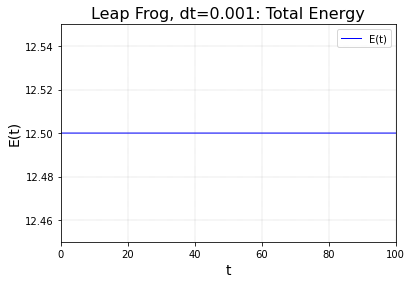

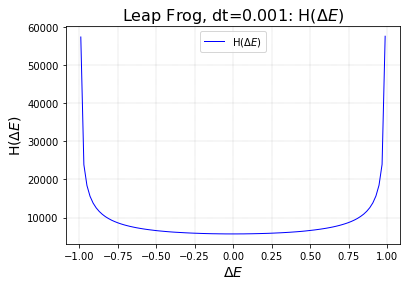

In [7]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_lf=[]
x_lf.append(A);
x_lf.append(math.sqrt(A**2 -(k/m)*(A*dt)**2));

xp = math.sqrt(A**2 -(k/m)*(A*0.5*dt)**2)

vx_lf_hs=[]
vx_lf_hs.append(-(k/m)*math.sqrt(A**2-xp**2))

ax_lf=[]
ax_lf.append(-(k/m)*x_lf[0])
ax_lf.append(-(k/m)*x_lf[1])


for i in range(2, len(t)+1):
    vx_lf_hs.append(vx_lf_hs[i-2]+dt*ax_lf[i-1])
    x_lf.append(x_lf[i-1]+dt*vx_lf_hs[i-1])
    ax_lf.append(-(k/m)*x_lf[i])
    
vx_lf_hs.append(vx_lf_hs[-1] + dt*ax_lf[-1])

vx_lf = []
vx_lf.append(-(k/m)*math.sqrt(A**2-x_lf[0]**2))

for i in range(1, len(t)):
    vx_lf.append((x_lf[i+1]-x_lf[i-1])/(2*dt))

del x_lf[-1]
del ax_lf[-1]

EK_lf = []
EP_lf = []
EC_lf = []
EI_lf = []

for i in range(len(t)):
    EK_lf.append(0.5*m*vx_lf[i]**2)
    EP_lf.append(0.5*k*(x_lf[i]**2))
    EC_lf.append(EK_lf[i]+EP_lf[i])
    EI_lf.append(EC_lf[0])
    
dH = np.sqrt(np.mean(np.power(np.subtract(EI_lf, EC_lf), 2)))

t_plot = t.copy()
x_plot = x_lf.copy()
vx_plot = vx_lf.copy()
ax_plot = ax_lf.copy()
E_plot = EC_lf.copy()

algorithm_name = f"Leap Frog, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)
plot_signal_hist(E_plot, algorithm_name)


# Verlet algorithm - velocity 

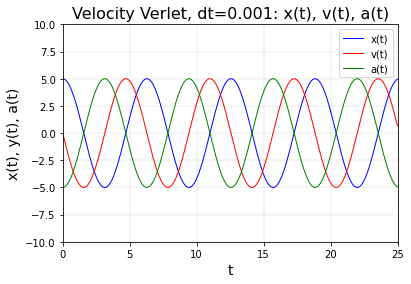

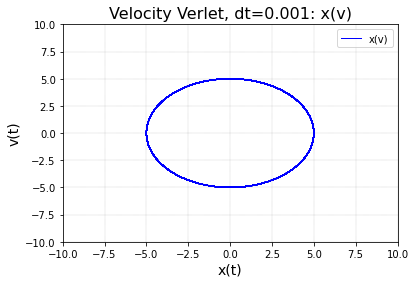

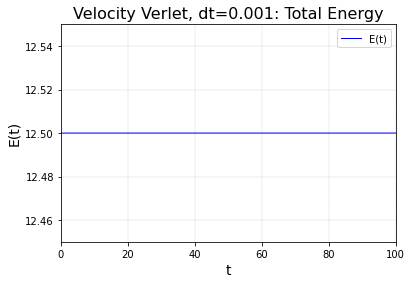

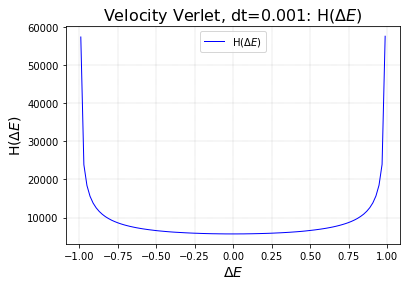

In [8]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_vel = []
x_vel.append(A);

vx_vel = []
vx_vel.append(0)

ax_vel = []
ax_vel.append(-(k/m)*x_vel[0]);

for i in range(1, len(t)):
    x_vel.append(x_vel[i-1]+dt*vx_vel[i-1]+0.5*dt*dt*ax_vel[i-1])
    ax_vel.append(-(k/m)*x_vel[i])
    vx_vel.append(vx_vel[i-1]+0.5*dt*(ax_vel[i-1]+ax_vel[i]))

EK_vel = []
EP_vel = []
EC_vel = []
EI_vel = []

for i in range(len(t)):
    EK_vel.append(0.5*m*vx_vel[i]**2)
    EP_vel.append(0.5*k*(x_vel[i]**2))
    EC_vel.append(EK_vel[i]+EP_vel[i])
    EI_vel.append(EC_vel[0])
    
dH = np.sqrt(np.mean(np.power(np.subtract(EI_vel, EC_vel), 2)))

t_plot = t.copy()
x_plot = x_vel.copy()
vx_plot = vx_vel.copy()
ax_plot = ax_vel.copy()
E_plot = EC_vel.copy()

algorithm_name = f"Velocity Verlet, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)
plot_signal_hist(E_plot, algorithm_name)


# Beeman's algorithm

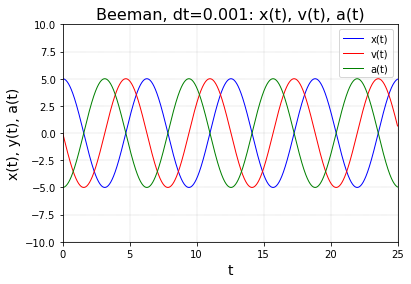

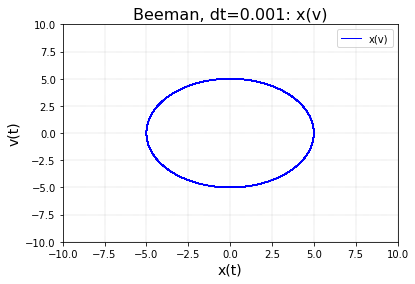

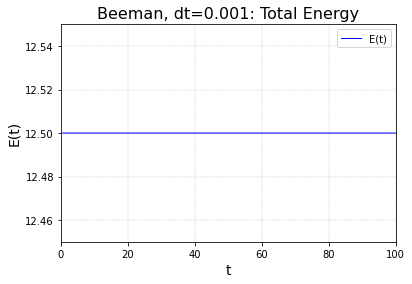

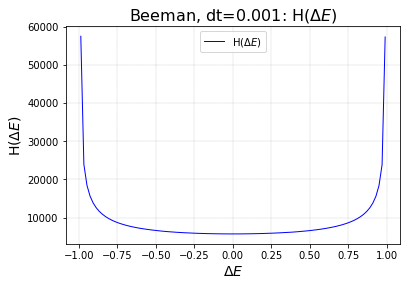

In [9]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_beeman = []
x_beeman.append(A)
x_beeman.append(math.sqrt(A**2 -(k/m)*(A*dt)**2))

vx_beeman = []
vx_beeman.append(0)
vx_beeman.append(-math.sqrt(k/m)*math.sqrt(A**2-x_beeman[1]**2))

ax_beeman = []
ax_beeman.append(-(k/m)*x_beeman[0])
ax_beeman.append(-(k/m)*x_beeman[1])

for i in range(2, len(t)):
    x_beeman.append(x_beeman[i-1]+dt*vx_beeman[i-1]+(2/3)*dt*dt*ax_beeman[i-1]-(1/6)*dt*dt*ax_beeman[i-2])
    ax_beeman.append(-(k/m)*x_beeman[i])
    vx_beeman.append(vx_beeman[i-1]+(1/3)*dt*ax_beeman[i]+(5/6)*dt*ax_beeman[i-1]-(1/6)*dt*ax_beeman[i-2])

EK_beeman = []
EP_beeman = []
EC_beeman = []
EI_beeman = []

for i in range(len(t)):
    EK_beeman.append(0.5*m*vx_beeman[i]**2)
    EP_beeman.append(0.5*k*(x_beeman[i]**2))
    EC_beeman.append(EK_beeman[i]+EP_beeman[i])
    EI_beeman.append(EC_beeman[0])

dH = np.sqrt(np.mean(np.power(np.subtract(EI_beeman, EC_beeman), 2)))
   
t_plot = t.copy()
x_plot = x_beeman.copy()
vx_plot = vx_beeman.copy()
ax_plot = ax_beeman.copy()
E_plot = EC_beeman.copy()

algorithm_name = f"Beeman, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)
plot_signal_hist(E_plot, algorithm_name)


# Runge-Kutta RK1

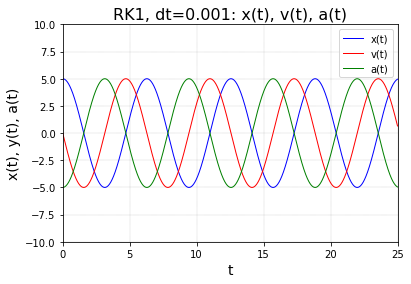

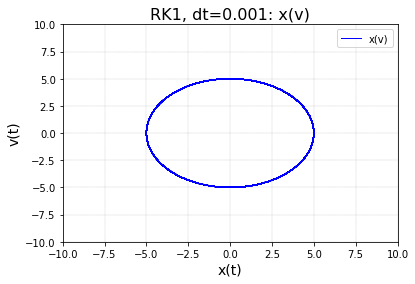

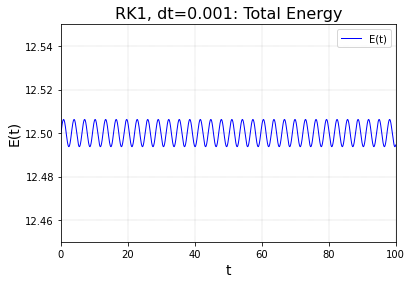

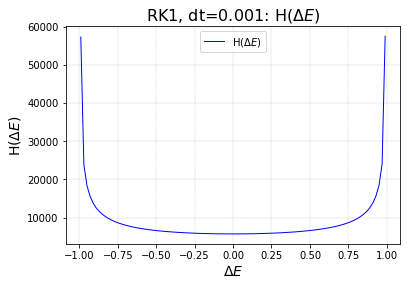

In [10]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_rk1 = []
x_rk1.append(A)

vx_rk1 = []
vx_rk1.append(0)

ax_rk1 = []
ax_rk1.append(-(k/m)*A)

for i in range(1, len(t)):
    kx1=dt*vx_rk1[i-1]
    x_rk1.append(x_rk1[i-1]+kx1)
    
    kv1=dt*(-(k/m)*x_rk1[i])
    vx_rk1.append(vx_rk1[i-1]+kv1)
    ax_rk1.append(-(k/m)*x_rk1[i])
    
EK_rk1 = []
EP_rk1 = []
EC_rk1 = []
EI_rk1 = []

for i in range(len(t)):
    EK_rk1.append(0.5*m*vx_rk1[i]**2)
    EP_rk1.append(0.5*k*(x_rk1[i]**2))
    EC_rk1.append(EK_rk1[i]+EP_rk1[i])
    EI_rk1.append(EC_rk1[0])

dH = np.sqrt(np.mean(np.power(np.subtract(EI_rk1, EC_rk1), 2)))

t_plot = t.copy()
x_plot = x_rk1.copy()
vx_plot = vx_rk1.copy()
ax_plot = ax_rk1.copy()
E_plot = EC_rk1.copy()

algorithm_name = f"RK1, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)
plot_signal_hist(E_plot, algorithm_name)

# Runge-Kutta RK2

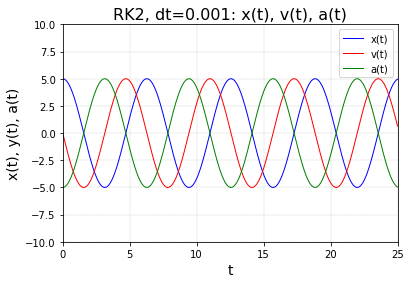

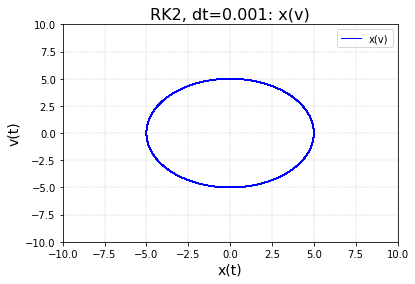

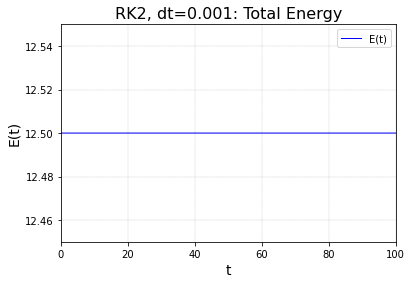

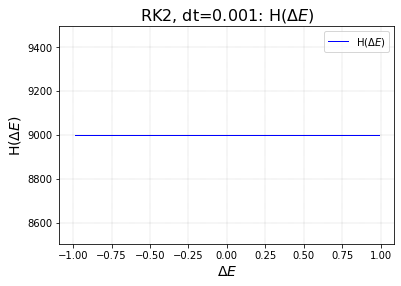

In [11]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_rk2 = []
x_rk2.append(A)

vx_rk2 = []
vx_rk2.append(0)

ax_rk2 = []
ax_rk2.append(-(k/m)*A)

for i in range(1, len(t)):
    kx1=vx_rk2[i-1]
    kv1=-(k/m)*x_rk2[i-1]
 
    kx2=vx_rk2[i-1]+0.5*dt*kv1
    kv2=-(k/m)*(x_rk2[i-1]+0.5*dt*kx1)
         
    vx_rk2.append(vx_rk2[i-1]+dt*kv2)
    x_rk2.append(x_rk2[i-1]+dt*kx2)
    ax_rk2.append(-(k/m)*x_rk2[i])
    
EK_rk2 = []
EP_rk2 = []
EC_rk2 = []
EI_rk2 = []

for i in range(len(t)):
    EK_rk2.append(0.5*m*vx_rk2[i]**2)
    EP_rk2.append(0.5*k*(x_rk2[i]**2))
    EC_rk2.append(EK_rk2[i]+EP_rk2[i])
    EI_rk2.append(EC_rk2[0])

dH = np.sqrt(np.mean(np.power(np.subtract(EI_rk2, EC_rk2), 2)))
    
t_plot = t.copy()
x_plot = x_rk2.copy()
vx_plot = vx_rk2.copy()
ax_plot = ax_rk2.copy()
E_plot = EC_rk2.copy()

algorithm_name = f"RK2, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)
plot_signal_hist(E_plot, algorithm_name)


# Runge-Kutta RK4

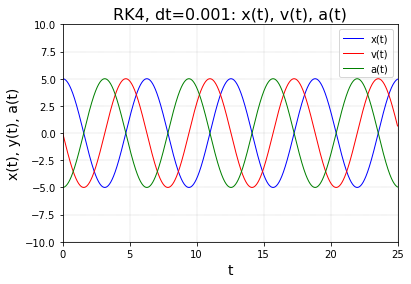

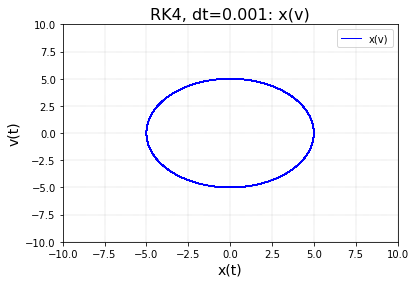

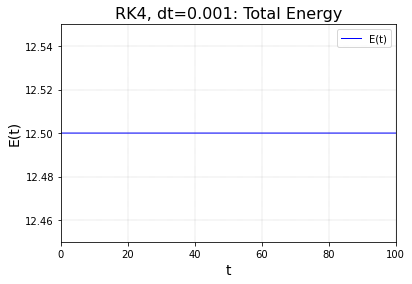

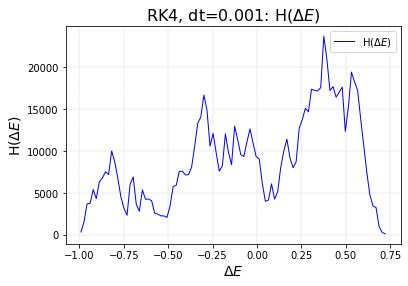

In [12]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_rk4 = []
x_rk4.append(A)

vx_rk4 = []
vx_rk4.append(0)

ax_rk4 = []
ax_rk4.append(-(k/m)*A)

for i in range(1, len(t)):
    kx1 = vx_rk4[i-1]
    kv1 = -(k/m)*x_rk4[i-1]
    
    kx2=vx_rk4[i-1]+0.5*dt*kv1
    kv2=-(k/m)*(x_rk4[i-1]+0.5*dt*kx1)
    
    kx3=vx_rk4[i-1]+0.5*dt*kv2;
    kv3=-(k/m)*(x_rk4[i-1]+0.5*dt*kx2)
    
    kx4=vx_rk4[i-1]+dt*kv3
    kv4=-(k/m)*(x_rk4[i-1]+dt*kx3)
    
    x_rk4.append(x_rk4[i-1]+(dt/6)*(kx1+2*kx2+2*kx3+kx4))
    vx_rk4.append(vx_rk4[i-1]+(dt/6)*(kv1+2*kv2+2*kv3+kv4))
    ax_rk4.append(-(k/m)*x_rk4[i])
    
EK_rk4 = []
EP_rk4 = []
EC_rk4 = []
EI_rk4 = []

for i in range(len(t)):
    EK_rk4.append(0.5*m*vx_rk4[i]**2)
    EP_rk4.append(0.5*k*(x_rk4[i]**2))
    EC_rk4.append(EK_rk4[i]+EP_rk4[i])
    EI_rk4.append(EC_rk4[0])

dH = np.sqrt(np.mean(np.power(np.subtract(EI_rk4, EC_rk4), 2)))    

t_plot = t.copy()
x_plot = x_rk4.copy()
vx_plot = vx_rk4.copy()
ax_plot = ax_rk4.copy()
E_plot = EC_rk4.copy()

algorithm_name = f"RK4, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)
plot_signal_hist(E_plot, algorithm_name)



# Gear 3

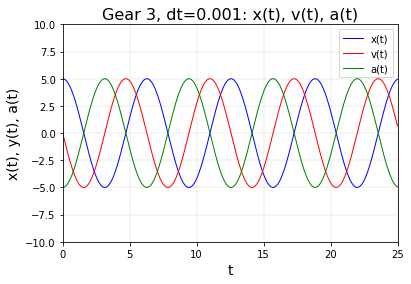

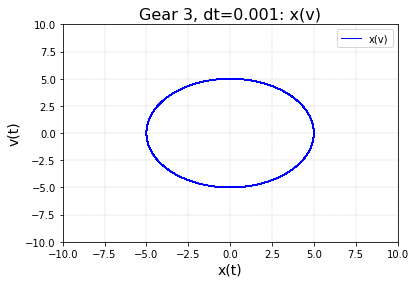

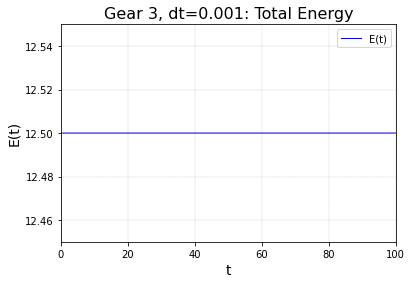

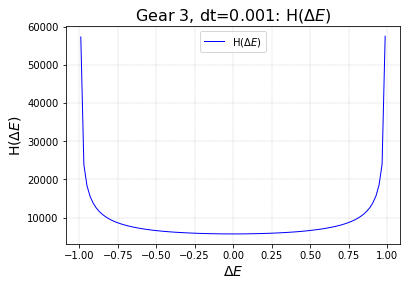

In [13]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_g3 = []
x_g3.append(A)

vx_g3 = []
vx_g3.append(0)

ax_g3 = []
ax_g3.append(0)

gear0=0
gear1=1
gear2=1

c1=dt;
c2=c1*dt/2
c3=c2*dt/3
c4=c3*dt/4

cX=gear0*c2
cV=gear1*c2/c1
cA=gear2*c2/c2

for i in range(1, len(t)):
    x_pred=x_g3[i-1]+dt*vx_g3[i-1]+0.5*dt*dt*ax_g3[i-1]
    vx_pred=vx_g3[i-1]+dt*ax_g3[i-1]
    ax_pred=ax_g3[i-1]
    
    da=(-(k/m)*x_pred)-ax_pred
    
    x_correct = x_pred + cX*da
    vx_correct = vx_pred + cV*da
    ax_correct =ax_pred + cA*da
    
    x_g3.append(x_correct)
    vx_g3.append(vx_correct)
    ax_g3.append(ax_correct)
    
EK_g3 = []
EP_g3 = []
EC_g3 = []
EI_g3 = []

for i in range(len(t)):
    EK_g3.append(0.5*m*vx_g3[i]**2)
    EP_g3.append(0.5*k*(x_g3[i]**2))
    EC_g3.append(EK_g3[i]+EP_g3[i])
    EI_g3.append(EC_g3[0])

#dH = np.sqrt(np.mean(np.power(np.subtract(EI_g3, EC_g3), 2)))    

t_plot = t.copy()
x_plot = x_g3.copy()
vx_plot = vx_g3.copy()
ax_plot = ax_g3.copy()
E_plot = EC_g3.copy()

algorithm_name = f"Gear 3, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)
plot_signal_hist(E_plot, algorithm_name)

# Gear 4

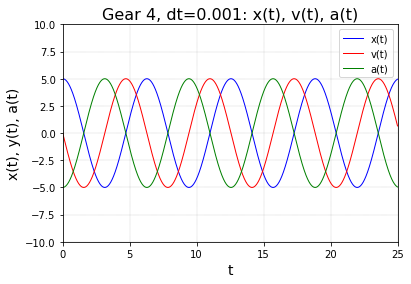

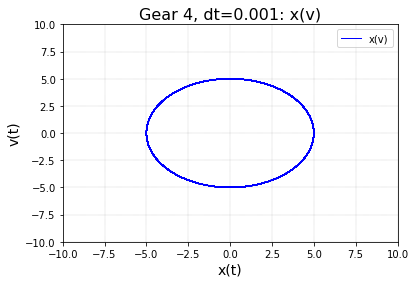

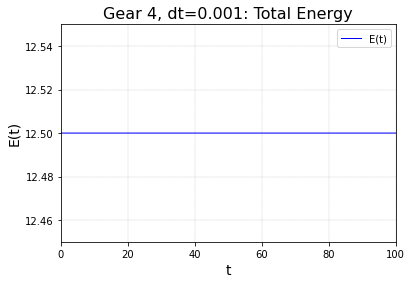

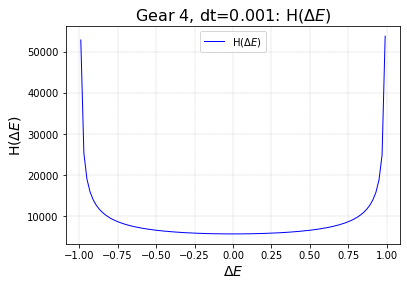

In [14]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_g4 = []
x_g4.append(A)

vx_g4 = []
vx_g4.append(0)

ax_g4 = []
ax_g4.append(0)

bx_g4 = []
bx_g4.append(0)

gear0=1/6
gear1=5/6
gear2=1
gear3=1/3

c1=dt
c2=c1*dt/2
c3=c2*dt/3
c4=c3*dt/4

cX=gear0*c2
cV=gear1*c2/c1
cA=gear2*c2/c2
cB=gear3*c2/c3


for i in range(1, len(t)):
    
    x_pred = x_g4[i-1]+dt*vx_g4[i-1]+0.5*dt*dt*ax_g4[i-1]+(1/6)*dt*dt*dt*bx_g4[i-1]
    vx_pred = vx_g4[i-1]+dt*ax_g4[i-1]+0.5*dt*dt*bx_g4[i-1]
    ax_pred = ax_g4[i-1]+dt*bx_g4[i-1]
    bx_pred = bx_g4[i-1]
    
    da=(-(k/m)*x_pred)-ax_pred
    
    x_correct = x_pred + cX*da
    vx_correct = vx_pred + cV*da
    ax_correct =ax_pred + cA*da
    bx_correct =bx_pred + cB*da
    
    x_g4.append(x_correct)
    vx_g4.append(vx_correct)
    ax_g4.append(ax_correct)
    bx_g4.append(bx_correct)
    
EK_g4 = []
EP_g4 = []
EC_g4 = []
EI_g4 = []

for i in range(len(t)):
    EK_g4.append(0.5*m*vx_g4[i]**2)
    EP_g4.append(0.5*k*(x_g4[i]**2))
    EC_g4.append(EK_g4[i]+EP_g4[i])
    EI_g4.append(EC_g4[0])

#dH = np.sqrt(np.mean(np.power(np.subtract(EI_g3, EC_g3), 2)))    

t_plot = t.copy()
x_plot = x_g4.copy()
vx_plot = vx_g4.copy()
ax_plot = ax_g4.copy()
E_plot = EC_g4.copy()

algorithm_name = f"Gear 4, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)
plot_signal_hist(E_plot, algorithm_name)


# Gear 5

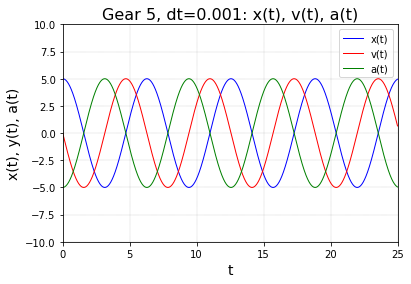

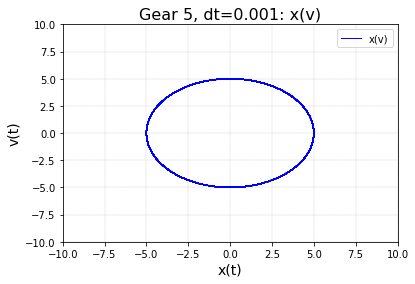

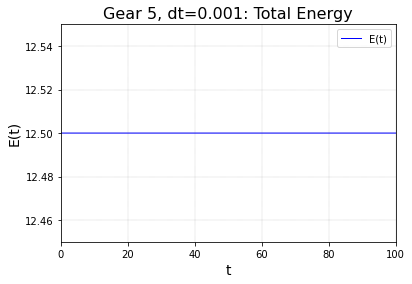

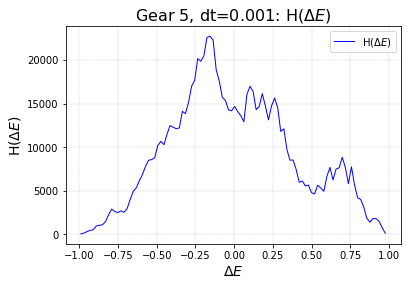

In [15]:
dt = 0.001
t=np.arange(0, 1000, dt)

x_g5 = []
x_g5.append(A)

vx_g5 = []
vx_g5.append(0)

ax_g5 = []
ax_g5.append(0)

bx_g5 = []
bx_g5.append(0)

cx_g5 = []
cx_g5.append(0)

gear0=19/120
gear1=3/4
gear2=1
gear3=1/2
gear4=1/12

c1=dt
c2=c1*dt/2
c3=c2*dt/3
c4=c3*dt/4

cX=gear0*c2
cV=gear1*c2/c1
cA=gear2*c2/c2
cB=gear3*c2/c3
cC=gear4*c2/c4


for i in range(1, len(t)):
    
    x_pred = x_g5[i-1]+dt*vx_g5[i-1]+0.5*dt*dt*ax_g5[i-1]+(1/6)*dt*dt*dt*bx_g5[i-1]+(1/24)*dt*dt*dt*dt*cx_g5[i-1];
    vx_pred = vx_g5[i-1]+dt*ax_g5[i-1]+0.5*dt*dt*bx_g5[i-1]+(1/6)*dt*dt*dt*cx_g5[i-1];
    ax_pred = ax_g5[i-1]+dt*bx_g5[i-1]+0.5*dt*dt*cx_g5[i-1];
    bx_pred = bx_g5[i-1]+dt*cx_g5[i-1];
    cx_pred = cx_g5[i-1]
    
    da=(-(k/m)*x_pred)-ax_pred
    
    x_correct = x_pred + cX*da
    vx_correct = vx_pred + cV*da
    ax_correct = ax_pred + cA*da
    bx_correct = bx_pred + cB*da
    cx_correct = cx_pred + cC*da
    
    x_g5.append(x_correct)
    vx_g5.append(vx_correct)
    ax_g5.append(ax_correct)
    bx_g5.append(bx_correct)
    cx_g5.append(cx_correct)
    
EK_g5 = []
EP_g5 = []
EC_g5 = []
EI_g5 = []

for i in range(len(t)):
    EK_g5.append(0.5*m*vx_g5[i]**2)
    EP_g5.append(0.5*k*(x_g5[i]**2))
    EC_g5.append(EK_g5[i]+EP_g5[i])
    EI_g5.append(EC_g5[0])

#dH = np.sqrt(np.mean(np.power(np.subtract(EI_g3, EC_g3), 2)))    

t_plot = t.copy()
x_plot = x_g5.copy()
vx_plot = vx_g5.copy()
ax_plot = ax_g5.copy()
E_plot = EC_g5.copy()

algorithm_name = f"Gear 5, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)
plot_signal_hist(E_plot, algorithm_name)

# Audio comparison

In [18]:
solver_sound(EC_rk4, 1, 300000, True, False)

array([ 0.3258427 ,  0.3258427 ,  0.3258427 , ..., -0.91573034,
       -0.917603  , -0.91947566])

# Animation

In [20]:
# Lista kolejnych położeń w czasie oscylatora harmonicznego
positions_x = x_theor[0:len(x_theor)-1:500]

# Ustawienia wykresu
fig, ax = plt.subplots()
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.axhline(y=0, color='gray', linestyle='--')
ax.axvline(x=0, color='gray', linestyle='--')
ax.axvline(x=-A, color='red', linestyle='--', linewidth=0.5)
ax.axvline(x=A, color='red', linestyle='--', linewidth=0.5)
ax.set_title('Oscylator harmoniczy')
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_aspect('equal')
line, = ax.plot([], [], '-', color='black')
disk, = ax.plot([], [], 'o', markersize=30)

# Funkcja animacji
def animate(i):
    x = positions_x[i]
    y = 0
    disk.set_data(x, y)
    line.set_data([0, x], [0, y])
    return disk,

# Tworzenie animacji
ani = animation.FuncAnimation(fig, animate, frames=len(positions_x), interval=25, blit=True)
plt.close()
# Wyświetlanie animacji
HTML(ani.to_jshtml())

In [169]:
# Lista kolejnych położeń w czasie oscylatora harmonicznego
positions_x = x_theor[0:len(x_st)-1:200]
positions_y = vx_theor[0:len(x_st)-1:200]

# Ustawienia wykresu
fig, ax = plt.subplots()
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.axhline(y=0, color='gray', linestyle='--')
ax.axvline(x=0, color='gray', linestyle='--')
ax.axvline(x=-A, color='red', linestyle='--', linewidth=0.5)
ax.axvline(x=A, color='red', linestyle='--', linewidth=0.5)
ax.set_title('Oscylator harmoniczy')
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_aspect('equal')
disk, = ax.plot([], [], 'o', markersize=10)

# Funkcja animacji
def animate(i):
    x = positions_x[i]
    y = positions_y[i]
    disk.set_data(x, y)
    line.set_data([0, x], [0, y])
    return disk,

# Tworzenie animacji
ani = animation.FuncAnimation(fig, animate, frames=len(positions_x), interval=25, blit=True)
plt.close()
# Wyświetlanie animacji
#HTML(ani.to_html5_video())
HTML(ani.to_jshtml())